In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [2]:
columns=['sepal-length', 'sepal-width', 'petal-length','petal-width','class']
df = pd.read_csv('D:/machine learning/dataset/iris.data.csv',names = columns)
df.head()

,sepal-length,sepal-width,petal-length,petal-width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
df.describe()

,sepal-length,sepal-width,petal-length,petal-width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [4]:
data = df.values
x = data[:,0:4]
x.shape


(150, 4)

In [5]:
y = data[:,4]

y.shape

(150,)

In [6]:
models = []
models.append(('LR', LogisticRegression(max_iter=125)))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

In [7]:
seed = 6
x_train,x_test,y_train,y_test = model_selection.train_test_split(x,y,test_size =0.20, random_state = seed)
x_train.shape

(120, 4)

In [8]:
for name, model in models:
    kfold = model_selection.KFold(n_splits = 10, shuffle = True, random_state = seed)
    cv_results = model_selection.cross_val_score(model,x_train,y_train,cv = kfold,scoring = 'accuracy')
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.958333 (0.041667)
LDA: 0.975000 (0.038188)
KNN: 0.958333 (0.041667)
CART: 0.958333 (0.041667)
NB: 0.966667 (0.040825)
SVM: 0.941667 (0.053359)


# hyper parameter tuning 


In [19]:
clf =  model_selection.GridSearchCV(SVC(gamma ='auto'),{
    'C':[1,10,20],
    'kernel': ['rbf','linear']
}, cv = 10,return_train_score=False) 
clf.fit(x_train,y_train)
clf.cv_results_

{'mean_fit_time': array([0.00169847, 0.0010987 , 0.00129871, 0.00089927, 0.00069928,
        0.        ]),
 'std_fit_time': array([0.00078064, 0.00029959, 0.00045786, 0.00029976, 0.00045779,
        0.        ]),
 'mean_score_time': array([0.00090015, 0.00069952, 0.00050027, 0.00029976, 0.00029993,
        0.00149994]),
 'std_score_time': array([0.00030006, 0.00045794, 0.00050027, 0.0004579 , 0.00045815,
        0.00229119]),
 'param_C': masked_array(data=[1, 1, 10, 10, 20, 20],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_kernel': masked_array(data=['rbf', 'linear', 'rbf', 'linear', 'rbf', 'linear'],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'C': 1, 'kernel': 'rbf'},
  {'C': 1, 'kernel': 'linear'},
  {'C': 10, 'kernel': 'rbf'},
  {'C': 10, 'kernel': 'linear'},
  {'C': 20, 'kernel': 'rbf'},
  {'C': 20, 'kernel': 'linear'}],


In [20]:
clfdata = pd.DataFrame(clf.cv_results_)
clfdata

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.001698,0.000781,0.0009,0.000300,1,rbf,"{'C': 1, 'kernel': 'rbf'}",0.916667,1.0,0.916667,1.0,1.0,1.0,0.916667,0.916667,0.916667,0.833333,0.941667,0.053359,6
1,0.001099,0.000300,0.0007,0.000458,1,linear,"{'C': 1, 'kernel': 'linear'}",0.916667,1.0,0.916667,1.0,1.0,1.0,0.916667,0.916667,1.000000,0.833333,0.950000,0.055277,2
2,0.001299,0.000458,0.0005,0.000500,10,rbf,"{'C': 10, 'kernel': 'rbf'}",0.916667,1.0,0.916667,1.0,1.0,1.0,0.916667,1.000000,0.833333,0.916667,0.950000,0.055277,2
3,0.000899,0.000300,0.0003,0.000458,10,linear,"{'C': 10, 'kernel': 'linear'}",0.916667,1.0,0.916667,1.0,1.0,1.0,0.916667,1.000000,0.916667,1.000000,0.966667,0.040825,1
4,0.000699,0.000458,0.0003,0.000458,20,rbf,"{'C': 20, 'kernel': 'rbf'}",0.916667,1.0,0.916667,1.0,1.0,1.0,0.916667,1.000000,0.833333,0.916667,0.950000,0.055277,2
5,0.000000,0.000000,0.0015,0.002291,20,linear,"{'C': 20, 'kernel': 'linear'}",0.916667,1.0,0.916667,1.0,1.0,1.0,0.916667,1.000000,0.833333,0.833333,0.941667,0.065085,5


In [23]:
clfdata[['param_C','param_kernel','mean_test_score','rank_test_score']]


,param_C,param_kernel,mean_test_score,rank_test_score
0,1,rbf,0.941667,6
1,1,linear,0.950000,2
2,10,rbf,0.950000,2
3,10,linear,0.966667,1
4,20,rbf,0.950000,2
5,20,linear,0.941667,5


In [24]:
dir(clf)

['__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_check_feature_names',
 '_check_n_features',
 '_check_refit_for_multimetric',
 '_estimator_type',
 '_format_results',
 '_get_param_names',
 '_get_tags',
 '_more_tags',
 '_pairwise',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_required_parameters',
 '_run_search',
 '_select_best_index',
 '_validate_data',
 'best_estimator_',
 'best_index_',
 'best_params_',
 'best_score_',
 'classes_',
 'cv',
 'cv_results_',
 'decision_function',
 'error_score',
 'estimator',
 'fit',
 'get_params',
 'inverse_transform',
 'multimetric_',
 'n_features_

In [26]:
clf.best_params_

{'C': 10, 'kernel': 'linear'}

In [28]:
clf.best_score_

0.9666666666666666

In [9]:
m1 = LogisticRegression()

In [10]:
m1.fit(x_train,y_train)

LogisticRegression()

In [11]:
m1.score(x_test,y_test)

0.9666666666666667

In [12]:
y_predicted = m1.predict(x_test)
y_predicted

array(['Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-virginica', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-setosa', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor'], dtype=object)

In [13]:
y_test

array(['Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-virginica', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-setosa', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor'], dtype=object)

In [14]:
#counting total number of true elements of each category in y_test 
unique, counts = np.unique(y_test, return_counts=True)

result = np.column_stack((unique, counts)) 
result

array([['Iris-setosa', 9],
       ['Iris-versicolor', 10],
       ['Iris-virginica', 11]], dtype=object)

In [15]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test,y_predicted)
cm

array([[ 9,  0,  0],
       [ 0, 10,  0],
       [ 0,  1, 10]], dtype=int64)

In [16]:
cmd_obj = ConfusionMatrixDisplay(cm, display_labels=['Iris-setosa', 'Iris-virginica', 'Iris-versicolor'])

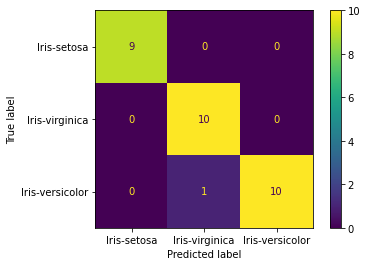

In [17]:
cmd_obj.plot()


(array([0.5, 1.5, 2.5]),
 [Text(0.5, 0, '0'), Text(1.5, 0, '1'), Text(2.5, 0, '2')])

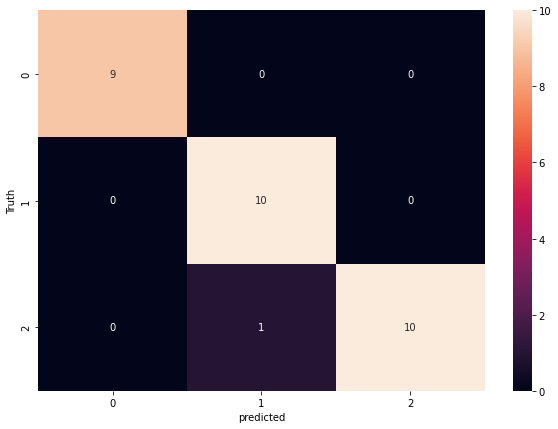

In [18]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm,annot = True)
plt.xlabel('predicted')
plt.ylabel('Truth')
plt.xticks()